# DATA PROCESSING FOR TRAIN DATA

In [84]:
# Importation des packages

# Base
import importlib
import functions
importlib.reload(functions)
from functions import *
import os

# Data Management
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [85]:
curr_dir = os.getcwd()

data_dir = os.path.join(curr_dir, "Data/Train_Data")
train_home_path = os.path.join(data_dir, "train_home_team_statistics_df.csv")
train_away_path = os.path.join(data_dir, "train_away_team_statistics_df.csv")

try:
    train_home_team_statistics_df = pd.read_csv(train_home_path, index_col=0)
    train_away_team_statistics_df = pd.read_csv(train_away_path, index_col=0)
    print("Files loaded")
    
except FileNotFoundError as e:
    print(e)


Files loaded


In [86]:
# 'LEAGUE' et 'TEAM_NAME' not included

home_teams = train_home_team_statistics_df.iloc[:,2:]
away_teams = train_away_team_statistics_df.iloc[:,2:]

# Rename

home_teams.columns = 'HOME_' + home_teams.columns
away_teams.columns = 'AWAY_' + away_teams.columns
train_data_teams = pd.concat([home_teams, away_teams], join='inner', axis=1)
train_data_teams = replacing(train_data_teams)

print(train_data_teams.shape) 

(12303, 280)


In [87]:
# columns = list(home_teams.columns)

# base_names = set([col.rsplit('_', 1)[0] for col in columns])

# cols_sum = {col.rsplit('_', 1)[0] for col in columns if col.endswith('_sum')}
# cols_avg = {col.rsplit('_', 1)[0] for col in columns if col.endswith('_average')}
# cols_std = {col.rsplit('_', 1)[0] for col in columns if col.endswith('_std')}

# only_sum = cols_sum - (cols_avg | cols_std)
# only_avg = cols_avg - (cols_sum | cols_std)
# only_std = cols_std - (cols_sum | cols_avg)

# print(f"Colonnes présentes uniquement en _sum: {only_sum}")
# print(f"Colonnes présentes uniquement en _average: {only_avg}")
# print(f"Colonnes présentes uniquement en _std: {only_std}")


In [88]:
# sum_cols = [col for col in train_data_teams.columns if col.endswith('_sum')]
# average_cols = [col for col in train_data_teams.columns if col.endswith('_average')]
# std_cols = [col for col in train_data_teams.columns if col.endswith('_std')]

# base_features = set([col.replace('_sum', '') for col in sum_cols])

# scaler = StandardScaler()
# cols_to_scale = sum_cols + average_cols + std_cols
# train_data_teams[cols_to_scale] = scaler.fit_transform(train_data_teams[cols_to_scale])

# # Calculate z-scores
# for base in base_features:
#     sum_col = f"{base}_sum"
#     avg_col = f"{base}_average"
#     std_col = f"{base}_std"

#     if sum_col in train_data_teams.columns and avg_col in train_data_teams.columns and std_col in train_data_teams.columns:
#         train_data_teams[f"{base}_zscore"] = (train_data_teams[sum_col] - train_data_teams[avg_col]) / (train_data_teams[std_col] + 1e-8)

# # Delete previous features
# cols_to_drop = sum_cols + average_cols + std_cols
# train_data_teams.drop(columns=cols_to_drop, inplace=True)


In [89]:
train_data_teams.shape

(12303, 280)

In [90]:
# train_data_teams = train_data_teams.loc[:, train_data_teams.columns.str.endswith('_average')]
# print(train_data_teams.shape)

In [91]:
# Treatment missing values
spot_columns(train_data_teams, percent=50)

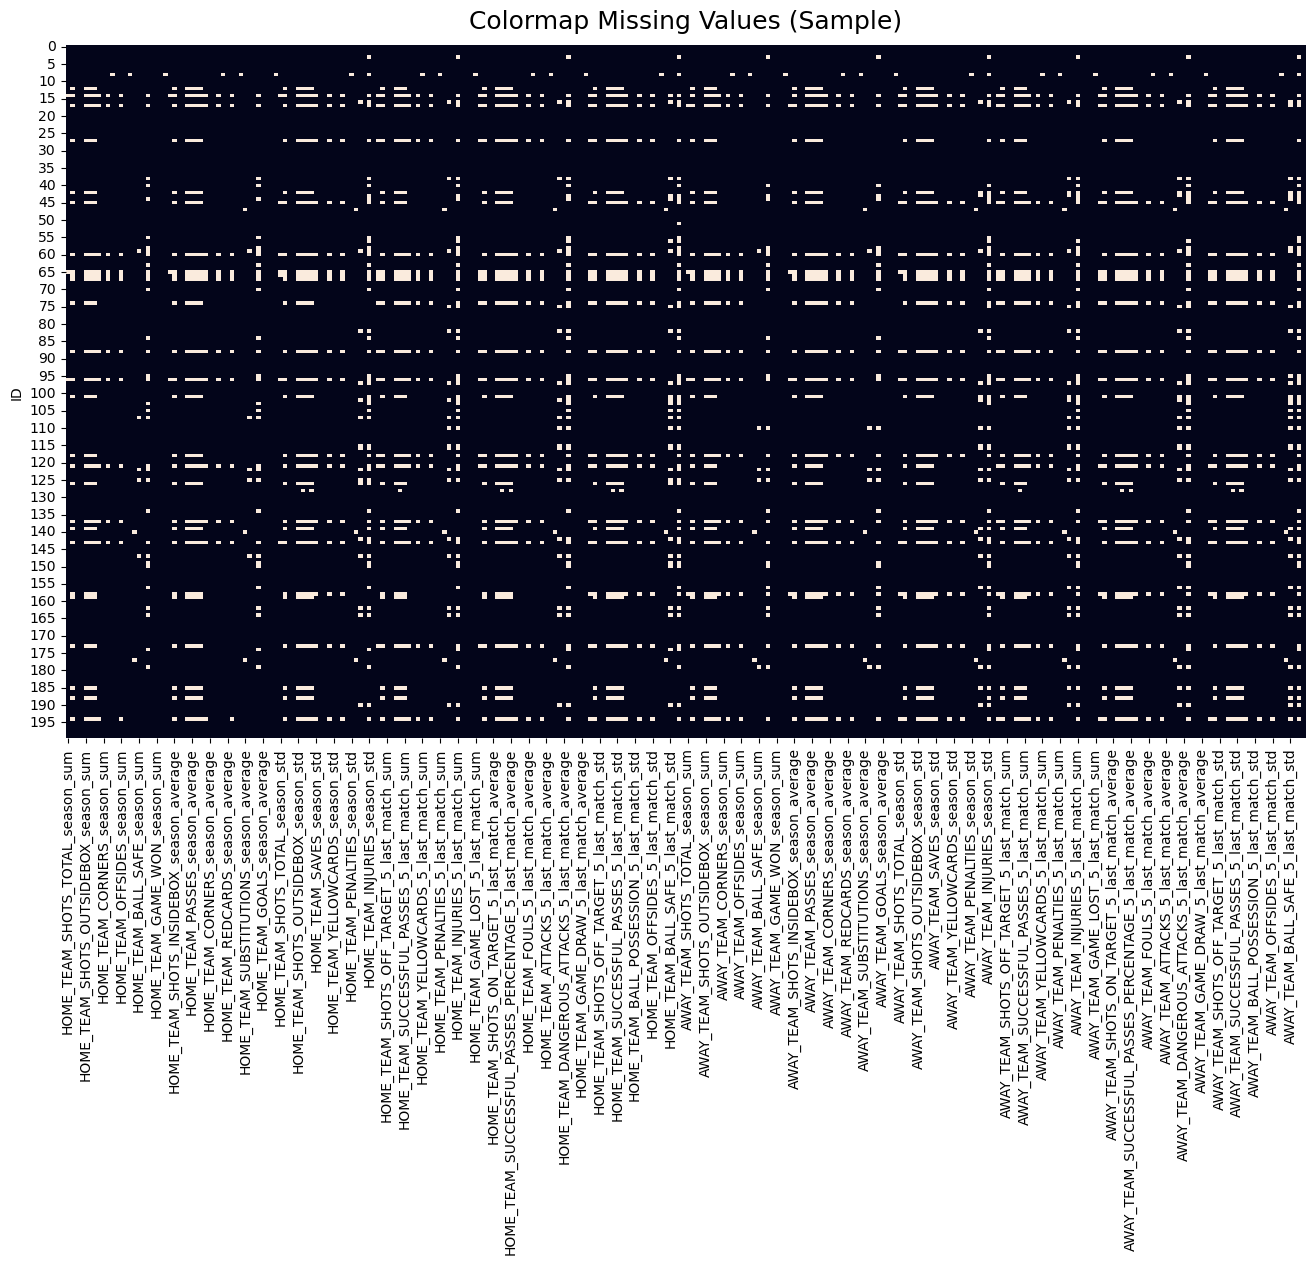

In [92]:
nan_colormap(train_data_teams.head(200), 'Colormap Missing Values (Sample)')

In [93]:
# Imputation with median

train_data_teams = train_data_teams.fillna(train_data_teams.select_dtypes(include=['number']).median())

In [94]:
spot_columns(train_data_teams, percent=0)

In [95]:
train_data_teams.head()

HOME_TEAM_SHOTS_TOTAL_season_sum  HOME_TEAM_SHOTS_INSIDEBOX_season_sum  \
ID                                                                           
0                                3.0                                   2.0   
1                                6.0                                   8.0   
2                                4.0                                   2.0   
3                                7.0                                   5.0   
4                                3.0                                   3.0   

    HOME_TEAM_SHOTS_OFF_TARGET_season_sum  \
ID                                          
0                                     5.0   
1                                     3.0   
2                                     5.0   
3                                     5.0   
4                                     2.0   

    HOME_TEAM_SHOTS_ON_TARGET_season_sum  \
ID                                         
0                                    2.0   
1                                    6.0   
2                                    2.0   
3                                    6.0   
4                                    3.0   

    HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum  HOME_TEAM_PASSES_season_sum  \
ID                                                                       
0                                     1.0                          2.0   
1                                     5.0                          8.0   
2                                     8.0                          1.0   
3                                     6.0                          9.0   
4                                     4.0                          4.0   

    HOME_TEAM_SUCCESSFUL_PASSES_season_sum  HOME_TEAM_SAVES_season_sum  \
ID                                                                       
0                                      2.0                         5.0   
1                                      7.0                        10.0   
2                                      1.0                         2.0   
3                                      9.0                         2.0   
4                                      3.0                         4.0   

    HOME_TEAM_CORNERS_season_sum  HOME_TEAM_FOULS_season_sum  \
ID                                                             
0                            3.0                         6.0   
1                            6.0                         8.0   
2                            2.0                         7.0   
3                            2.0                         0.0   
4                            4.0                         7.0   

    HOME_TEAM_YELLOWCARDS_season_sum  HOME_TEAM_REDCARDS_season_sum  \
ID                                                                    
0                                2.0                            2.0   
1                                3.0                            0.0   
2                                7.0                            6.0   
3                                0.0                            6.0   
4                                4.0                            6.0   

    HOME_TEAM_OFFSIDES_season_sum  HOME_TEAM_ATTACKS_season_sum  \
ID                                                                
0                             1.0                           2.0   
1                             7.0                           7.0   
2                             3.0                           4.0   
3                             8.0                           6.0   
4                             2.0                           4.0   

    HOME_TEAM_PENALTIES_season_sum  HOME_TEAM_SUBSTITUTIONS_season_sum  \
ID                                                                       
0                              6.0                                 8.0   
1                              6.0                                10.0   
2                              5.0                                10.0   
3      

In [96]:
train_data_teams.shape

(12303, 280)

**feature engineering**

In [97]:
### DIFFERENCES
# Get the list of HOME and AWAY columns
home_columns = [col for col in train_data_teams.columns if col.startswith('HOME_TEAM_')]
away_columns = [col for col in train_data_teams.columns if col.startswith('AWAY_TEAM_')]

# Ensure there is a corresponding AWAY column for each HOME column
common_columns = [(home, home.replace('HOME_TEAM_', 'AWAY_TEAM_')) for home in home_columns if home.replace('HOME_TEAM_', 'AWAY_TEAM_') in away_columns]

# Add difference features
for home_col, away_col in common_columns:
    diff_col_name = home_col.replace('HOME_TEAM_', 'DIFF_')  # Name of the new column
    train_data_teams[diff_col_name] = train_data_teams[home_col] - train_data_teams[away_col]

# Delete initial features
cols_to_drop = home_columns + away_columns
train_data_teams.drop(columns=cols_to_drop, inplace=True)


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [98]:
train_data_teams.shape

(12303, 140)

In [99]:
train_data_teams.head()

DIFF_SHOTS_TOTAL_season_sum  DIFF_SHOTS_INSIDEBOX_season_sum  \
ID                                                                 
0                          -1.0                              1.0   
1                           2.0                              5.0   
2                           0.0                             -1.0   
3                           7.0                              5.0   
4                          -2.0                             -1.0   

    DIFF_SHOTS_OFF_TARGET_season_sum  DIFF_SHOTS_ON_TARGET_season_sum  \
ID                                                                      
0                                1.0                              1.0   
1                               -1.0                              3.0   
2                                1.0                              0.0   
3                                5.0                              6.0   
4                               -3.0                             -3.0   

    DIFF_SHOTS_OUTSIDEBOX_season_sum  DIFF_PASSES_season_sum  \
ID                                                             
0                               -4.0                    -2.0   
1                               -3.0                     0.0   
2                                2.0                    -3.0   
3                                5.0                     6.0   
4                               -1.0                    -2.0   

    DIFF_SUCCESSFUL_PASSES_season_sum  DIFF_SAVES_season_sum  \
ID                                                             
0                                -1.0                   -1.0   
1                                 0.0                    2.0   
2                                -3.0                    1.0   
3                                 6.0                   -6.0   
4                                -3.0                    0.0   

    DIFF_CORNERS_season_sum  DIFF_FOULS_season_sum  \
ID                                                   
0                      -1.0                    0.0   
1                       1.0                    0.0   
2                      -4.0                   -1.0   
3                       1.0                   -3.0   
4                      -1.0                    2.0   

    DIFF_YELLOWCARDS_season_sum  DIFF_REDCARDS_season_sum  \
ID                                                          
0                          -8.0                      -4.0   
1                           0.0                      -2.0   
2                          -3.0                      -1.0   
3                           0.0                       1.0   
4                           4.0                       6.0   

    DIFF_OFFSIDES_season_sum  DIFF_ATTACKS_season_sum  \
ID                                                      
0                        0.0                     -2.0   
1                        2.0                      2.0   
2                       -4.0                     -1.0   
3                        6.0                      4.0   
4                       -4.0                     -2.0   

    DIFF_PENALTIES_season_sum  DIFF_SUBSTITUTIONS_season_sum  \
ID                                                             
0                        -4.0                            0.0   
1                         3.0                            0.0   
2                         2.0                            3.0   
3                         5.0                            3.0   
4                        -3.0                           -4.0   

    DIFF_BALL_SAFE_season_sum  DIFF_DANGEROUS_ATTACKS_season_sum  \
ID                                                                 
0                         2.0                                0.0   
1                         5.0                               -1.0   
2                         1.0                               -4.0   
3                        -7.0                                3.0   
4                        -1.0                        

In [100]:
# ### MOMENTUM
# # Identify recent and season columns for HOME and AWAY teams
# recent_columns_home = [col for col in train_data_teams.columns if '_5_last_match_' in col and col.startswith('HOME_TEAM_')]
# recent_columns_away = [col for col in train_data_teams.columns if '_5_last_match_' in col and col.startswith('AWAY_TEAM_')]

# season_columns_home = [col.replace('_5_last_match_', '_season_') for col in recent_columns_home if col.replace('_5_last_match_', '_season_') in train_data_teams.columns]
# season_columns_away = [col.replace('_5_last_match_', '_season_') for col in recent_columns_away if col.replace('_5_last_match_', '_season_') in train_data_teams.columns]

# # Compute momentum features for HOME and AWAY teams
# for recent_col, season_col in zip(recent_columns_home, season_columns_home):
#     momentum_col_name = recent_col.replace('HOME_TEAM_', 'MOMENTUM_HOME_').replace('_5_last_match_', '_')
#     train_data_teams[momentum_col_name] = train_data_teams[recent_col] - train_data_teams[season_col]

# for recent_col, season_col in zip(recent_columns_away, season_columns_away):
#     momentum_col_name = recent_col.replace('AWAY_TEAM_', 'MOMENTUM_AWAY_').replace('_5_last_match_', '_')
#     train_data_teams[momentum_col_name] = train_data_teams[recent_col] - train_data_teams[season_col]


In [101]:
# ### CATEGORICAL
# # Liste des features importantes pour définir "HOME_STRONG_TEAM" et "AWAY_STRONG_TEAM"
# home_features = [
#     'HOME_TEAM_GOALS_season_sum',
#     'HOME_TEAM_ATTACKS_season_sum',
#     'HOME_TEAM_SAVES_season_sum'
# ]

# away_features = [
#     'AWAY_TEAM_GOALS_season_sum',
#     'AWAY_TEAM_ATTACKS_season_sum',
#     'AWAY_TEAM_SAVES_season_sum'
# ]

# # Calculer la médiane pour chaque feature
# home_medians = train_data_teams[home_features].median()
# away_medians = train_data_teams[away_features].median()

# # Créer les labels "STRONG_TEAM" basés sur plusieurs critères
# train_data_teams['HOME_STRONG_TEAM'] = train_data_teams[home_features].gt(home_medians).sum(axis=1).apply(lambda x: 1 if x >= 2 else 0)
# train_data_teams['AWAY_STRONG_TEAM'] = train_data_teams[away_features].gt(away_medians).sum(axis=1).apply(lambda x: 1 if x >= 2 else 0)


In [102]:
# ### FORM STREAKS
# # Define the metrics for form streaks
# metrics = ['GAME_WON', 'GAME_DRAW', 'GAME_LOST']
# teams = ['HOME_TEAM', 'AWAY_TEAM']

# # Loop through each team and metric to compute ratios
# for team in teams:
#     total_games_col = f"{team}_GAME_WON_season_sum"  # Base column to calculate total games
#     total_games = (
#         train_data_teams[f"{team}_GAME_WON_season_sum"]
#         + train_data_teams[f"{team}_GAME_DRAW_season_sum"]
#         + train_data_teams[f"{team}_GAME_LOST_season_sum"]
#     )
    
#     for metric in metrics:
#         ratio_col = f"{team}_{metric}_RATIO"  # New column name
#         train_data_teams[ratio_col] = train_data_teams[f"{team}_{metric}_season_sum"] / (total_games + 1e-9)  # Avoid division by zero


In [103]:
# # Interaction Features
# train_data_teams['HOME_GOALS_x_HOME_SHOTS'] = train_data_teams['HOME_TEAM_GOALS_season_average'] * train_data_teams['HOME_TEAM_SHOTS_TOTAL_season_average']
# train_data_teams['AWAY_GOALS_x_AWAY_SHOTS'] = train_data_teams['AWAY_TEAM_GOALS_season_average'] * train_data_teams['AWAY_TEAM_SHOTS_TOTAL_season_average']

# train_data_teams['HOME_CORNERS_x_SHOTS'] = train_data_teams['HOME_TEAM_CORNERS_season_average'] * train_data_teams['HOME_TEAM_SHOTS_TOTAL_season_average']
# train_data_teams['AWAY_CORNERS_x_SHOTS'] = train_data_teams['AWAY_TEAM_CORNERS_season_average'] * train_data_teams['AWAY_TEAM_SHOTS_TOTAL_season_average']

# train_data_teams['HOME_FOULS_x_YELLOW_CARDS'] = train_data_teams['HOME_TEAM_FOULS_season_average'] * train_data_teams['HOME_TEAM_YELLOWCARDS_season_average']
# train_data_teams['AWAY_FOULS_x_YELLOW_CARDS'] = train_data_teams['AWAY_TEAM_FOULS_season_average'] * train_data_teams['AWAY_TEAM_YELLOWCARDS_season_average']

# train_data_teams['HOME_GOALS_x_SHOTS_ON_TARGET'] = train_data_teams['HOME_TEAM_GOALS_season_average'] * train_data_teams['HOME_TEAM_SHOTS_ON_TARGET_season_average']
# train_data_teams['AWAY_GOALS_x_SHOTS_ON_TARGET'] = train_data_teams['AWAY_TEAM_GOALS_season_average'] * train_data_teams['AWAY_TEAM_SHOTS_ON_TARGET_season_average']

In [104]:
# # Exportation du fichier final

# train_data_path = os.path.join(data_dir, "train_data_teams.csv")
# train_data_teams.to_csv(train_data_path)

In [105]:
train_home_player_path = os.path.join(data_dir, "train_home_player_statistics_df.csv")
train_away_player_path = os.path.join(data_dir, "train_away_player_statistics_df.csv")

try:
    train_home_player_statistics_df = pd.read_csv(train_home_player_path, index_col=0)
    train_away_player_statistics_df = pd.read_csv(train_away_player_path, index_col=0)
    
    print("Files loaded")
except FileNotFoundError as e:
    print(e)


Files loaded


In [106]:
train_home_player_statistics_df.shape

(237079, 306)

In [107]:
# 'LEAGUE', 'TEAM_NAME' et 'PLAYER_NAME' not included

home_players = train_home_player_statistics_df.drop(columns=['LEAGUE', 'PLAYER_NAME', 'TEAM_NAME'], axis=1)
away_players = train_away_player_statistics_df.drop(columns=['LEAGUE', 'PLAYER_NAME', 'TEAM_NAME'], axis=1)

# Rename

home_players.columns = 'HOME_' + home_players.columns
away_players.columns = 'AWAY_' + away_players.columns

home_players = replacing(home_players)
away_players = replacing(away_players)

print(home_players.shape)
print(away_players.shape) 

(237079, 303)
(236132, 303)


In [108]:
# Delete if NaNs% > 50%
spot_columns(home_players, percent=50)

Column 'HOME_PLAYER_CAPTAIN_season_sum' has 89.33% NaN values
Column 'HOME_PLAYER_PUNCHES_season_sum' has 71.54% NaN values
Column 'HOME_PLAYER_LONG_BALLS_season_sum' has 100.00% NaN values
Column 'HOME_PLAYER_LONG_BALLS_WON_season_sum' has 100.00% NaN values
Column 'HOME_PLAYER_SHOTS_OFF_TARGET_season_sum' has 100.00% NaN values
Column 'HOME_PLAYER_CAPTAIN_season_average' has 100.00% NaN values
Column 'HOME_PLAYER_PUNCHES_season_average' has 71.54% NaN values
Column 'HOME_PLAYER_LONG_BALLS_season_average' has 100.00% NaN values
Column 'HOME_PLAYER_LONG_BALLS_WON_season_average' has 100.00% NaN values
Column 'HOME_PLAYER_SHOTS_OFF_TARGET_season_average' has 100.00% NaN values
Column 'HOME_PLAYER_CAPTAIN_season_std' has 100.00% NaN values
Column 'HOME_PLAYER_PUNCHES_season_std' has 71.95% NaN values
Column 'HOME_PLAYER_LONG_BALLS_season_std' has 100.00% NaN values
Column 'HOME_PLAYER_LONG_BALLS_WON_season_std' has 100.00% NaN values
Column 'HOME_PLAYER_SHOTS_OFF_TARGET_season_std' has 1

In [109]:
home_players = home_players.drop(columns=home_players.columns[home_players.isna().mean() > 0.5])
away_players = away_players.drop(columns=away_players.columns[away_players.isna().mean() > 0.5])

In [110]:
# home_players.to_csv('../data/Train_Data/home_players_df.csv')
# away_players.to_csv('../data/Train_Data/away_players_df.csv')

In [111]:
spot_columns(home_players, percent=0)

Column 'HOME_POSITION' has 18.06% NaN values
Column 'HOME_PLAYER_ACCURATE_CROSSES_season_sum' has 11.93% NaN values
Column 'HOME_PLAYER_ACCURATE_PASSES_season_sum' has 11.93% NaN values
Column 'HOME_PLAYER_AERIALS_WON_season_sum' has 11.93% NaN values
Column 'HOME_PLAYER_ASSISTS_season_sum' has 1.52% NaN values
Column 'HOME_PLAYER_BIG_CHANCES_CREATED_season_sum' has 12.61% NaN values
Column 'HOME_PLAYER_BIG_CHANCES_MISSED_season_sum' has 12.61% NaN values
Column 'HOME_PLAYER_BLOCKED_SHOTS_season_sum' has 12.61% NaN values
Column 'HOME_PLAYER_CLEARANCES_season_sum' has 11.93% NaN values
Column 'HOME_PLAYER_CLEARANCE_OFFLINE_season_sum' has 12.63% NaN values
Column 'HOME_PLAYER_DISPOSSESSED_season_sum' has 11.93% NaN values
Column 'HOME_PLAYER_DRIBBLED_ATTEMPTS_season_sum' has 22.82% NaN values
Column 'HOME_PLAYER_DRIBBLED_PAST_season_sum' has 22.82% NaN values
Column 'HOME_PLAYER_DUELS_LOST_season_sum' has 12.61% NaN values
Column 'HOME_PLAYER_DUELS_WON_season_sum' has 11.93% NaN values

In [112]:
# Imputation
home_players = home_players.fillna({'HOME_POSITION': home_players['HOME_POSITION'].mode()[0]})
home_players = home_players.fillna(home_players.select_dtypes(include=['number']).median())

In [113]:
spot_columns(away_players, percent=0)

Column 'AWAY_POSITION' has 17.89% NaN values
Column 'AWAY_PLAYER_ACCURATE_CROSSES_season_sum' has 12.06% NaN values
Column 'AWAY_PLAYER_ACCURATE_PASSES_season_sum' has 12.06% NaN values
Column 'AWAY_PLAYER_AERIALS_WON_season_sum' has 12.06% NaN values
Column 'AWAY_PLAYER_ASSISTS_season_sum' has 1.62% NaN values
Column 'AWAY_PLAYER_BIG_CHANCES_CREATED_season_sum' has 12.72% NaN values
Column 'AWAY_PLAYER_BIG_CHANCES_MISSED_season_sum' has 12.72% NaN values
Column 'AWAY_PLAYER_BLOCKED_SHOTS_season_sum' has 12.72% NaN values
Column 'AWAY_PLAYER_CLEARANCES_season_sum' has 12.06% NaN values
Column 'AWAY_PLAYER_CLEARANCE_OFFLINE_season_sum' has 12.74% NaN values
Column 'AWAY_PLAYER_DISPOSSESSED_season_sum' has 12.06% NaN values
Column 'AWAY_PLAYER_DRIBBLED_ATTEMPTS_season_sum' has 22.94% NaN values
Column 'AWAY_PLAYER_DRIBBLED_PAST_season_sum' has 22.94% NaN values
Column 'AWAY_PLAYER_DUELS_LOST_season_sum' has 12.72% NaN values
Column 'AWAY_PLAYER_DUELS_WON_season_sum' has 12.06% NaN values

In [114]:
away_players = away_players.fillna({'AWAY_POSITION': away_players['AWAY_POSITION'].mode()[0]})
away_players = away_players.fillna(away_players.select_dtypes(include=['number']).median())

spot_columns(away_players, percent=0)

In [115]:
home_players.tail()

HOME_POSITION  HOME_PLAYER_ACCURATE_CROSSES_season_sum  \
ID                                                             
12302    midfielder                                      3.0   
12302      attacker                                      0.0   
12302    midfielder                                      0.0   
12302    goalkeeper                                      0.0   
12302      attacker                                     15.0   

       HOME_PLAYER_ACCURATE_PASSES_season_sum  \
ID                                              
12302                                    17.0   
12302                                    10.0   
12302                                    50.0   
12302                                     9.0   
12302                                    26.0   

       HOME_PLAYER_AERIALS_WON_season_sum  HOME_PLAYER_ASSISTS_season_sum  \
ID                                                                          
12302                                 3.0                             0.0   
12302                                 1.0                            16.0   
12302                                10.0                             0.0   
12302                                 0.0                             0.0   
12302                                10.0                           100.0   

       HOME_PLAYER_BIG_CHANCES_CREATED_season_sum  \
ID                                                  
12302                                         6.0   
12302                                        12.0   
12302                                         0.0   
12302                                         0.0   
12302                                        62.0   

       HOME_PLAYER_BIG_CHANCES_MISSED_season_sum  \
ID                                                 
12302                                        0.0   
12302                                       14.0   
12302                                        0.0   
12302                                        0.0   
12302                                       57.0   

       HOME_PLAYER_BLOCKED_SHOTS_season_sum  \
ID                                            
12302                                  11.0   
12302                                   0.0   
12302                                  22.0   
12302                                   0.0   
12302                                   5.0   

       HOME_PLAYER_CLEARANCES_season_sum  \
ID                                         
12302                                5.0   
12302                                2.0   
12302                               15.0   
12302                                4.0   
12302                                8.0   

       HOME_PLAYER_CLEARANCE_OFFLINE_season_sum  \
ID                                                
12302                                       0.0   
12302                                       0.0   
12302                                       0.0   
12302                                       0.0   
12302                                       0.0   

       HOME_PLAYER_DISPOSSESSED_season_sum  \
ID                                           
12302                                  8.0   
12302                                 14.0   
12302                                 32.0   
12302                                  0.0   
12302                                 30.0   

       HOME_PLAYER_DRIBBLED_ATTEMPTS_season_sum  \
ID                                                
12302                                      11.0   
12302                                      12.0   
12302                                      12.0   
12302                                       0.0   
12302                                      22.0   

       HOME_PLAYER_DRIBBLED_PAST_season_sum  \
ID                                            
12302                                  41.0   
12302                                  26.0   
12302                                  26.0   
12302                  

In [116]:
# Je remets les colonnes dans le bonne ordre même si ce n'est pas obligatoire.

# cols = list(home_players.columns)
# col1_idx, col2_idx = cols.index('HOME_POSITION'), cols.index('HOME_ID')
# cols[col1_idx], cols[col2_idx] = cols[col2_idx], cols[col1_idx]
# home_players = home_players[cols]

# cols = list(away_players.columns)
# col1_idx, col2_idx = cols.index('AWAY_POSITION'), cols.index('AWAY_ID')
# cols[col1_idx], cols[col2_idx] = cols[col2_idx], cols[col1_idx]
# away_players = away_players[cols]

## Sum

In [117]:
# sum_cols = [col for col in home_players.columns if col.endswith('_sum')]
# average_cols = [col for col in home_players.columns if col.endswith('_average')]
# std_cols = [col for col in home_players.columns if col.endswith('_std')]

# scaler = StandardScaler()
# cols_to_scale = sum_cols + average_cols + std_cols
# home_players[cols_to_scale] = scaler.fit_transform(home_players[cols_to_scale])

# base_features = set([col.replace('_sum', '') for col in sum_cols])

# for base in base_features:
#     sum_col = f"{base}_sum"
#     avg_col = f"{base}_average"
#     std_col = f"{base}_std"

#     if sum_col in home_players.columns and avg_col in home_players.columns and std_col in home_players.columns:
#         home_players[f"{base}_zscore"] = (home_players[sum_col] - home_players[avg_col]) / (home_players[std_col] + 1e-8)

# cols_to_drop = sum_cols + average_cols + std_cols
# home_players.drop(columns=cols_to_drop, inplace=True)


In [118]:
# sum_cols = [col for col in away_players.columns if col.endswith('_sum')]
# average_cols = [col for col in away_players.columns if col.endswith('_average')]
# std_cols = [col for col in away_players.columns if col.endswith('_std')]

# scaler = StandardScaler()
# cols_to_scale = sum_cols + average_cols + std_cols
# away_players[cols_to_scale] = scaler.fit_transform(away_players[cols_to_scale])

# base_features = set([col.replace('_sum', '') for col in sum_cols])

# for base in base_features:
#     sum_col = f"{base}_sum"
#     avg_col = f"{base}_average"
#     std_col = f"{base}_std"

#     if sum_col in away_players.columns and avg_col in away_players.columns and std_col in away_players.columns:
#         away_players[f"{base}_zscore"] = (away_players[sum_col] - away_players[avg_col]) / (away_players[std_col] + 1e-8)

# cols_to_drop = sum_cols + average_cols + std_cols
# away_players.drop(columns=cols_to_drop, inplace=True)


In [119]:
# # Je vais agréger les colonnes par poste et par matchs pour réduire la taile du dataframe des joueurs.
# # Il est important de le faire avant la fusion pour garder un lien entre les joueurs et les équipes comme 
# # TEAM_NAME n'est pas dans le dataframe de soumission. 

columns_to_aggregate_home = [col for col in home_players.columns if col.endswith(('average'))]
columns_to_aggregate_away = [col for col in away_players.columns if col.endswith(('average'))]

# print(len(columns_to_aggregate_home))
# print(len(columns_to_aggregate_away))



In [120]:
set(home_players['HOME_POSITION'])

{'attacker', 'defender', 'goalkeeper', 'midfielder'}

In [121]:
# # Création des tables home_agg et away_agg pour les agréger avec la table train_data_teams.

# home_agg = home_players.groupby([home_players.index, 'HOME_POSITION']).agg({
#     col: ['mean', 'max', 'min'] for col in columns_to_aggregate_home  # Agréger par la moyenne
# }).reset_index()

# away_agg = away_players.groupby([away_players.index, 'AWAY_POSITION']).agg({
#     col: ['mean', 'max', 'min'] for col in columns_to_aggregate_away  # Agréger par la moyenne également
# }).reset_index()


In [122]:
# Building tables


home_agg = home_players.groupby([home_players.index, 'HOME_POSITION']).agg({
    col: ['mean'] for col in columns_to_aggregate_home   # Agréger par la moyenne
}).reset_index()


away_agg = away_players.groupby([away_players.index, 'AWAY_POSITION']).agg({
    col: ['mean'] for col in columns_to_aggregate_away  # Agréger par la moyenne également
}).reset_index()


In [123]:
# # Building tables

# home_agg = home_players.groupby([home_players.index, 'HOME_POSITION']).agg({
#     col: ['mean'] for col in columns_to_aggregate_home  # Agréger par la moyenne
# }).reset_index()

# away_agg = away_players.groupby([away_players.index, 'AWAY_POSITION']).agg({
#     col: ['mean'] for col in columns_to_aggregate_away  # Agréger par la moyenne également
# }).reset_index()


In [124]:
home_agg.head()

ID HOME_POSITION HOME_PLAYER_ACCURATE_CROSSES_season_average  \
                                                          mean   
0  0      defender                                    3.166667   
1  0    goalkeeper                                    0.000000   
2  0    midfielder                                   12.500000   
3  1      defender                                    5.600000   
4  1    goalkeeper                                    0.000000   

  HOME_PLAYER_ACCURATE_PASSES_season_average  \
                                        mean   
0                                  38.666667   
1                                  13.500000   
2                                  17.800000   
3                                  44.400000   
4                                  10.500000   

  HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average  \
                                                   mean   
0                                               70.5      
1                                               60.0      
2                                               69.4      
3                                               72.2      
4                                               52.5      

  HOME_PLAYER_AERIALS_WON_season_average HOME_PLAYER_ASSISTS_season_average  \
                                    mean                               mean   
0                              30.166667                           3.666667   
1                               1.000000                           0.000000   
2                              13.900000                           5.700000   
3                              32.000000                           3.600000   
4                               3.000000                           0.000000   

  HOME_PLAYER_BIG_CHANCES_CREATED_season_average  \
                                            mean   
0                                            5.0   
1                                            0.0   
2                                            9.5   
3                                            2.4   
4                                            0.0   

  HOME_PLAYER_BIG_CHANCES_MISSED_season_average  \
                                           mean   
0                                           0.0   
1                                           0.0   
2                                           7.7   
3                                           2.4   
4                                           0.0   

  HOME_PLAYER_BLOCKED_SHOTS_season_average  \
                                      mean   
0                                     17.0   
1                                      0.0   
2                                      6.4   
3                                     24.0   
4                                      0.0   

  HOME_PLAYER_CLEARANCES_season_average  \
                                   mean   
0                                  36.0   
1                                   6.0   
2                                   6.4   
3                                  49.2   
4                                   3.5   

  HOME_PLAYER_CLEARANCE_OFFLINE_season_average  \
                                          mean   
0                                          6.0   
1                                          0.0   
2                                          0.0   
3                                          8.2   
4                                          0.0   

  HOME_PLAYER_DISPOSSESSED_season_average  \
                                     mean   
0                               10.166667   
1                                0.000000   
2                               25.100000   
3                                6.200000   
4                                0.000000   

  HOME_PLAYER_DRIBBLED_ATTEMPTS_season_average  \
                                          mean   
0                                     3.666667   
1                                     0.000000   
2                  

In [125]:
# Aplatir les colonnes multi-niveaux générées par le groupby ou agrégations précédentes
home_agg.columns = ['_'.join(col).strip() for col in home_agg.columns.values]
home_agg = home_agg.rename(columns={'ID_' : 'HOME_ID', 'HOME_POSITION_' : 'HOME_POSITION'})

home_agg.head(5)

HOME_ID HOME_POSITION  HOME_PLAYER_ACCURATE_CROSSES_season_average_mean  \
0        0      defender                                          3.166667   
1        0    goalkeeper                                          0.000000   
2        0    midfielder                                         12.500000   
3        1      defender                                          5.600000   
4        1    goalkeeper                                          0.000000   

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean  \
0                                        38.666667   
1                                        13.500000   
2                                        17.800000   
3                                        44.400000   
4                                        10.500000   

   HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean  \
0                                               70.5            
1                                               60.0            
2                                               69.4            
3                                               72.2            
4                                               52.5            

   HOME_PLAYER_AERIALS_WON_season_average_mean  \
0                                    30.166667   
1                                     1.000000   
2                                    13.900000   
3                                    32.000000   
4                                     3.000000   

   HOME_PLAYER_ASSISTS_season_average_mean  \
0                                 3.666667   
1                                 0.000000   
2                                 5.700000   
3                                 3.600000   
4                                 0.000000   

   HOME_PLAYER_BIG_CHANCES_CREATED_season_average_mean  \
0                                                5.0     
1                                                0.0     
2                                                9.5     
3                                                2.4     
4                                                0.0     

   HOME_PLAYER_BIG_CHANCES_MISSED_season_average_mean  \
0                                                0.0    
1                                                0.0    
2                                                7.7    
3                                                2.4    
4                                                0.0    

   HOME_PLAYER_BLOCKED_SHOTS_season_average_mean  \
0                                           17.0   
1                                            0.0   
2                                            6.4   
3                                           24.0   
4                                            0.0   

   HOME_PLAYER_CLEARANCES_season_average_mean  \
0                                        36.0   
1                                         6.0   
2                                         6.4   
3                                        49.2   
4                                         3.5   

   HOME_PLAYER_CLEARANCE_OFFLINE_season_average_mean  \
0                                                6.0   
1                                                0.0   
2                                                0.0   
3                                                8.2   
4                                                0.0   

   HOME_PLAYER_DISPOSSESSED_season_average_mean  \
0                                     10.166667   
1                                      0.000000   
2                                     25.100000   
3                                      6.200000   
4                                      0.000000   

   HOME_PLAYER_DRIBBLED_ATTEMPTS_season_average_mean  \
0                                           3.666667   
1                                           0.000000   
2                                          10.700000   
3                                           5.200000   
4               

In [126]:
home_agg.shape

(40729, 94)

In [127]:
# Aplatir les colonnes multi-niveaux générées par le groupby ou agrégations précédentes
away_agg.columns = ['_'.join(col).strip() for col in away_agg.columns.values]
away_agg = away_agg.rename(columns={'ID_' : 'AWAY_ID', 'AWAY_POSITION_' : 'AWAY_POSITION'})

away_agg.head(5)

AWAY_ID AWAY_POSITION  AWAY_PLAYER_ACCURATE_CROSSES_season_average_mean  \
0        0      defender                                          5.400000   
1        0    goalkeeper                                          0.000000   
2        0    midfielder                                          8.454545   
3        1      defender                                          1.857143   
4        1    goalkeeper                                          0.000000   

   AWAY_PLAYER_ACCURATE_PASSES_season_average_mean  \
0                                        40.600000   
1                                        11.500000   
2                                        23.909091   
3                                        31.571429   
4                                        14.500000   

   AWAY_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean  \
0                                          77.400000            
1                                          65.000000            
2                                          76.454545            
3                                          70.714286            
4                                          54.000000            

   AWAY_PLAYER_AERIALS_WON_season_average_mean  \
0                                    31.400000   
1                                     2.000000   
2                                    10.181818   
3                                    26.428571   
4                                     0.500000   

   AWAY_PLAYER_ASSISTS_season_average_mean  \
0                                 3.400000   
1                                 0.000000   
2                                 5.636364   
3                                 3.000000   
4                                 0.000000   

   AWAY_PLAYER_BIG_CHANCES_CREATED_season_average_mean  \
0                                           3.400000     
1                                           0.000000     
2                                           5.545455     
3                                           4.571429     
4                                           0.000000     

   AWAY_PLAYER_BIG_CHANCES_MISSED_season_average_mean  \
0                                           5.000000    
1                                           0.000000    
2                                           3.454545    
3                                           2.285714    
4                                           0.000000    

   AWAY_PLAYER_BLOCKED_SHOTS_season_average_mean  \
0                                      18.400000   
1                                       0.000000   
2                                       5.363636   
3                                      20.857143   
4                                       0.000000   

   AWAY_PLAYER_CLEARANCES_season_average_mean  \
0                                   25.000000   
1                                    2.500000   
2                                    6.636364   
3                                   36.571429   
4                                    6.000000   

   AWAY_PLAYER_CLEARANCE_OFFLINE_season_average_mean  \
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                           7.142857   
4                                           0.000000   

   AWAY_PLAYER_DISPOSSESSED_season_average_mean  \
0                                     15.200000   
1                                      0.000000   
2                                     21.545455   
3                                      7.142857   
4                                      0.000000   

   AWAY_PLAYER_DRIBBLED_ATTEMPTS_season_average_mean  \
0                                          11.000000   
1                                           0.000000   
2                                           7.818182   
3                                           4.857143   
4               

In [128]:
# Générer une nouvelle liste de colonnes avec les suffixes pour 'mean', 'min', 'max', 'median'
columns_to_aggregate_home_expanded = []
columns_to_aggregate_away_expanded = []

# Pour home
for col in columns_to_aggregate_home:
    columns_to_aggregate_home_expanded.extend([
        f"{col}_mean", 
        #f"{col}_min", 
        #f"{col}_max"
        #f"{col}_median"
    ])

# Pour away
for col in columns_to_aggregate_away:
    columns_to_aggregate_away_expanded.extend([
        f"{col}_mean", 
        #f"{col}_min", 
        #f"{col}_max"
       # f"{col}_median"
    ])

In [129]:
home_pivot = home_agg.pivot(index='HOME_ID', columns='HOME_POSITION', values=columns_to_aggregate_home_expanded)

home_pivot.columns = ['_'.join(col).strip() for col in home_pivot.columns.values]
home_pivot.reset_index(inplace=True)


In [130]:
# Pivot pour home_agg
home_pivot = home_agg.pivot(index='HOME_ID', columns='HOME_POSITION', values=columns_to_aggregate_home_expanded)

home_pivot.head(5)

HOME_PLAYER_ACCURATE_CROSSES_season_average_mean            \
HOME_POSITION                                         attacker  defender   
HOME_ID                                                                    
0                                                          NaN  3.166667   
1                                                          NaN  5.600000   
2                                                         4.50  8.285714   
3                                                         2.75  0.500000   
4                                                        18.00  0.200000   

                                     \
HOME_POSITION goalkeeper midfielder   
HOME_ID                               
0                    0.0  12.500000   
1                    0.0  12.272727   
2                    0.0  11.900000   
3                    0.0  20.000000   
4                    0.0  18.285714   

              HOME_PLAYER_ACCURATE_PASSES_season_average_mean             \
HOME_POSITION                                        attacker   defender   
HOME_ID                                                                    
0                                                         NaN  38.666667   
1                                                         NaN  44.400000   
2                                                        6.00  28.000000   
3                                                       16.00  53.250000   
4                                                       19.75  29.000000   

                                     \
HOME_POSITION goalkeeper midfielder   
HOME_ID                               
0                   13.5  17.800000   
1                   10.5  18.363636   
2                   11.0  19.700000   
3                   19.5  43.375000   
4                    7.5  34.285714   

              HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean  \
HOME_POSITION                                                   attacker   
HOME_ID                                                                    
0                                                            NaN           
1                                                            NaN           
2                                                          56.25           
3                                                          54.00           
4                                                          71.00           

                                                \
HOME_POSITION   defender goalkeeper midfielder   
HOME_ID                                          
0              70.500000       60.0  69.400000   
1              72.200000       52.5  66.636364   
2              63.857143       48.0  60.600000   
3              67.000000       57.5  61.250000   
4              69.000000       61.0  75.857143   

              HOME_PLAYER_AERIALS_WON_season_average_mean             \
HOME_POSITION                                    attacker   defender   
HOME_ID                                                                
0                                                     NaN  30.166667   
1                                                     NaN  32.000000   
2                                                    5.00  16.428571   
3                                                   14.75  31.250000   
4                                                   13.75  23.200000   

                                    HOME_PLAYER_ASSISTS_season_average_mean  \
HOME_POSITION goalkeeper midfielder                                attacker   
HOME_ID                                                                       
0                    1.0  13.900000                                     NaN   
1                    3.0   9.000000                                     NaN   
2                    1.0  12.900000                                    1.75   
3                    1.5   9.750000                                    6.00   
4                    1.5  17.4

In [131]:
# Aplatir les colonnes multi-niveaux générées par pivot_table
home_pivot.columns = ['_'.join(col).strip() for col in home_pivot.columns.values]
home_pivot.reset_index(inplace=True)

home_pivot.head(5)

# Tout fonctionne bien, il ne restera plus qu'à traiter les NaNs. 

HOME_ID  HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_attacker  \
0        0                                                NaN           
1        1                                                NaN           
2        2                                               4.50           
3        3                                               2.75           
4        4                                              18.00           

   HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_defender  \
0                                           3.166667           
1                                           5.600000           
2                                           8.285714           
3                                           0.500000           
4                                           0.200000           

   HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_goalkeeper  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_midfielder  \
0                                          12.500000             
1                                          12.272727             
2                                          11.900000             
3                                          20.000000             
4                                          18.285714             

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean_attacker  \
0                                                NaN          
1                                                NaN          
2                                               6.00          
3                                              16.00          
4                                              19.75          

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean_defender  \
0                                          38.666667          
1                                          44.400000          
2                                          28.000000          
3                                          53.250000          
4                                          29.000000          

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean_goalkeeper  \
0                                               13.5            
1                                               10.5            
2                                               11.0            
3                                               19.5            
4                                                7.5            

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean_midfielder  \
0                                          17.800000            
1                                          18.363636            
2                                          19.700000            
3                                          43.375000            
4                                          34.285714            

   HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_attacker  \
0                                                NaN                     
1                                                NaN                     
2                                              56.25                     
3                                              54.00                     
4                                              71.00                     

   HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_defender  \
0                                          70.500000                     
1                                          72.200000                     
2                                          63.857143                     
3                                          67.000000                     
4                             

In [132]:
# Pivot pour away_agg
away_pivot = away_agg.pivot(index='AWAY_ID', columns='AWAY_POSITION', values=columns_to_aggregate_away_expanded)

# Aplatir les colonnes multi-niveaux générées par pivot_table
away_pivot.columns = ['_'.join(col).strip() for col in away_pivot.columns.values]
away_pivot.reset_index(inplace=True)

away_pivot.head(5)

AWAY_ID  AWAY_PLAYER_ACCURATE_CROSSES_season_average_mean_attacker  \
0        0                                                NaN           
1        1                                                NaN           
2        2                                               32.4           
3        3                                                5.5           
4        4                                                3.0           

   AWAY_PLAYER_ACCURATE_CROSSES_season_average_mean_defender  \
0                                           5.400000           
1                                           1.857143           
2                                           7.571429           
3                                           8.714286           
4                                           5.500000           

   AWAY_PLAYER_ACCURATE_CROSSES_season_average_mean_goalkeeper  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   AWAY_PLAYER_ACCURATE_CROSSES_season_average_mean_midfielder  \
0                                           8.454545             
1                                           9.888889             
2                                           2.666667             
3                                           6.600000             
4                                          14.000000             

   AWAY_PLAYER_ACCURATE_PASSES_season_average_mean_attacker  \
0                                                NaN          
1                                                NaN          
2                                               22.4          
3                                               14.5          
4                                                8.5          

   AWAY_PLAYER_ACCURATE_PASSES_season_average_mean_defender  \
0                                          40.600000          
1                                          31.571429          
2                                          39.714286          
3                                          34.857143          
4                                          46.500000          

   AWAY_PLAYER_ACCURATE_PASSES_season_average_mean_goalkeeper  \
0                                               11.5            
1                                               14.5            
2                                               15.0            
3                                               13.0            
4                                               13.5            

   AWAY_PLAYER_ACCURATE_PASSES_season_average_mean_midfielder  \
0                                          23.909091            
1                                          29.000000            
2                                          25.333333            
3                                          34.800000            
4                                          25.125000            

   AWAY_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_attacker  \
0                                                NaN                     
1                                                NaN                     
2                                               58.0                     
3                                               47.0                     
4                                               68.5                     

   AWAY_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_defender  \
0                                          77.400000                     
1                                          70.714286                     
2                                          65.000000                     
3                                          50.142857                     
4                             

In [133]:
# Je fais maintenant le merge sur l'ID des matchs. 

home_pivot.rename(columns={'HOME_ID': 'ID'}, inplace=True)
away_pivot.rename(columns={'AWAY_ID': 'ID'}, inplace=True)

train_data_players_avg = home_pivot.merge(away_pivot, on='ID', how='inner')

train_data_players_avg.head(5)

ID  HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_attacker  \
0   0                                                NaN           
1   1                                                NaN           
2   2                                               4.50           
3   3                                               2.75           
4   4                                              18.00           

   HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_defender  \
0                                           3.166667           
1                                           5.600000           
2                                           8.285714           
3                                           0.500000           
4                                           0.200000           

   HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_goalkeeper  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_midfielder  \
0                                          12.500000             
1                                          12.272727             
2                                          11.900000             
3                                          20.000000             
4                                          18.285714             

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean_attacker  \
0                                                NaN          
1                                                NaN          
2                                               6.00          
3                                              16.00          
4                                              19.75          

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean_defender  \
0                                          38.666667          
1                                          44.400000          
2                                          28.000000          
3                                          53.250000          
4                                          29.000000          

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean_goalkeeper  \
0                                               13.5            
1                                               10.5            
2                                               11.0            
3                                               19.5            
4                                                7.5            

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean_midfielder  \
0                                          17.800000            
1                                          18.363636            
2                                          19.700000            
3                                          43.375000            
4                                          34.285714            

   HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_attacker  \
0                                                NaN                     
1                                                NaN                     
2                                              56.25                     
3                                              54.00                     
4                                              71.00                     

   HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_defender  \
0                                          70.500000                     
1                                          72.200000                     
2                                          63.857143                     
3                                          67.000000                     
4                                          69.000000        

In [134]:
spot_columns(train_data_players_avg, 50)

Column 'HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_attacker' has 53.00% NaN values
Column 'HOME_PLAYER_ACCURATE_PASSES_season_average_mean_attacker' has 53.00% NaN values
Column 'HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_attacker' has 53.00% NaN values
Column 'HOME_PLAYER_AERIALS_WON_season_average_mean_attacker' has 53.00% NaN values
Column 'HOME_PLAYER_ASSISTS_season_average_mean_attacker' has 53.00% NaN values
Column 'HOME_PLAYER_BIG_CHANCES_CREATED_season_average_mean_attacker' has 53.00% NaN values
Column 'HOME_PLAYER_BIG_CHANCES_MISSED_season_average_mean_attacker' has 53.00% NaN values
Column 'HOME_PLAYER_BLOCKED_SHOTS_season_average_mean_attacker' has 53.00% NaN values
Column 'HOME_PLAYER_CLEARANCES_season_average_mean_attacker' has 53.00% NaN values
Column 'HOME_PLAYER_CLEARANCE_OFFLINE_season_average_mean_attacker' has 53.00% NaN values
Column 'HOME_PLAYER_DISPOSSESSED_season_average_mean_attacker' has 53.00% NaN values
Column 'HOME_PLAYER_DRIBBLED_ATTE

In [135]:
# À nouveau, je supprime toutes les colonnes où il y a plus de 50% de NaNs.

train_data_players_avg = train_data_players_avg.drop(columns=train_data_players_avg.columns[train_data_players_avg.isna().mean() > 0.5])

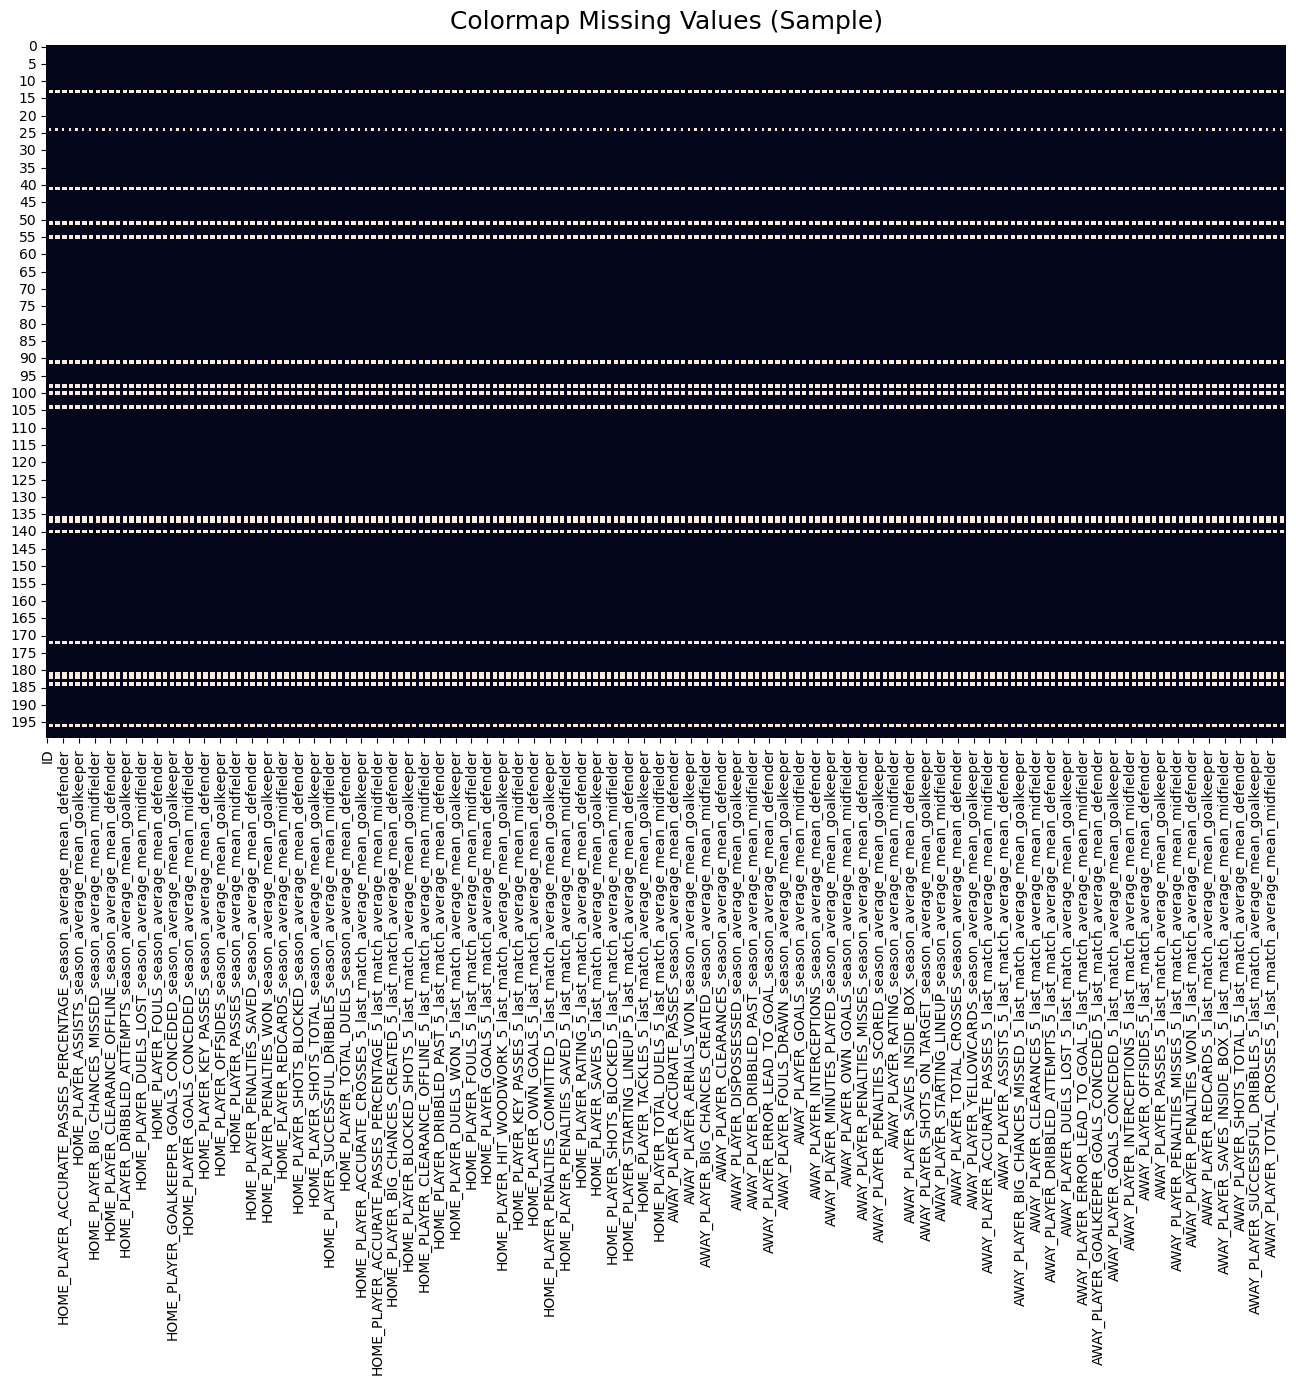

In [136]:
nan_colormap(train_data_players_avg.head(200), 'Colormap Missing Values (Sample)')

In [137]:
# train_data_players.to_csv('../data/Train_Data/players_df.csv')

In [138]:
spot_columns(train_data_players_avg, percent=0)

Column 'HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_defender' has 9.00% NaN values
Column 'HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_goalkeeper' has 6.96% NaN values
Column 'HOME_PLAYER_ACCURATE_PASSES_season_average_mean_defender' has 9.00% NaN values
Column 'HOME_PLAYER_ACCURATE_PASSES_season_average_mean_goalkeeper' has 6.96% NaN values
Column 'HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_defender' has 9.00% NaN values
Column 'HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_goalkeeper' has 6.96% NaN values
Column 'HOME_PLAYER_AERIALS_WON_season_average_mean_defender' has 9.00% NaN values
Column 'HOME_PLAYER_AERIALS_WON_season_average_mean_goalkeeper' has 6.96% NaN values
Column 'HOME_PLAYER_ASSISTS_season_average_mean_defender' has 9.00% NaN values
Column 'HOME_PLAYER_ASSISTS_season_average_mean_goalkeeper' has 6.96% NaN values
Column 'HOME_PLAYER_BIG_CHANCES_CREATED_season_average_mean_defender' has 9.00% NaN values
Column 'HOME_PLAYER_BIG_CHANC

In [139]:
# Il reste des colonnes dans lesquelles il y a moins de 10% de NaNs.
# Je vais donc remplacer ces NaNs par les médianes des colonnes concernées.

train_data_players_avg = train_data_players_avg.fillna(train_data_players_avg.select_dtypes(include=['number']).median())

In [140]:
spot_columns(train_data_players_avg, percent=0)

In [141]:
print(train_data_players_avg.shape)

(12303, 553)


In [142]:
# aggregated_features = {}

# for base_feature in columns_to_aggregate_home:
#     cols_to_aggregate = [col for col in train_data_players.columns if col.startswith(base_feature)]
    
#     if cols_to_aggregate:
#         train_data_players[f"{base_feature}_team"] = train_data_players[cols_to_aggregate].mean(axis=1)

#         aggregated_features[base_feature] = cols_to_aggregate # To delete

# cols_to_drop = [col for cols in aggregated_features.values() for col in cols]
# train_data_players.drop(columns=cols_to_drop, inplace=True)


In [143]:
# aggregated_features = {}

# for base_feature in columns_to_aggregate_away:
#     cols_to_aggregate = [col for col in train_data_players.columns if col.startswith(base_feature)]
    
#     if cols_to_aggregate:
#         train_data_players[f"{base_feature}_team"] = train_data_players[cols_to_aggregate].mean(axis=1)

#         aggregated_features[base_feature] = cols_to_aggregate # To delete

# cols_to_drop = [col for cols in aggregated_features.values() for col in cols]
# train_data_players.drop(columns=cols_to_drop, inplace=True)


In [144]:
train_data_players_avg.shape

(12303, 553)

In [145]:
train_data_players_avg.head()

ID  HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_defender  \
0   0                                           3.166667           
1   1                                           5.600000           
2   2                                           8.285714           
3   3                                           0.500000           
4   4                                           0.200000           

   HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_goalkeeper  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   HOME_PLAYER_ACCURATE_CROSSES_season_average_mean_midfielder  \
0                                          12.500000             
1                                          12.272727             
2                                          11.900000             
3                                          20.000000             
4                                          18.285714             

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean_defender  \
0                                          38.666667          
1                                          44.400000          
2                                          28.000000          
3                                          53.250000          
4                                          29.000000          

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean_goalkeeper  \
0                                               13.5            
1                                               10.5            
2                                               11.0            
3                                               19.5            
4                                                7.5            

   HOME_PLAYER_ACCURATE_PASSES_season_average_mean_midfielder  \
0                                          17.800000            
1                                          18.363636            
2                                          19.700000            
3                                          43.375000            
4                                          34.285714            

   HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_defender  \
0                                          70.500000                     
1                                          72.200000                     
2                                          63.857143                     
3                                          67.000000                     
4                                          69.000000                     

   HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_goalkeeper  \
0                                               60.0                       
1                                               52.5                       
2                                               48.0                       
3                                               57.5                       
4                                               61.0                       

   HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_midfielder  \
0                                          69.400000                       
1                                          66.636364                       
2                                          60.600000                       
3                                          61.250000                       
4                                          75.857143                       

   HOME_PLAYER_AERIALS_WON_season_average_mean_defender  \
0                                          30.166667      
1                                          32.000000      
2                                          16.428571      
3                                          3

In [146]:
home_columns = [col for col in train_data_players_avg.columns if col.startswith('HOME_PLAYER_')]
away_columns = [col for col in train_data_players_avg.columns if col.startswith('AWAY_PLAYER_')]

common_columns = [(home, home.replace('HOME_PLAYER_', 'AWAY_PLAYER_')) for home in home_columns if home.replace('HOME_PLAYER_', 'AWAY_PLAYER_') in away_columns]

for home_col, away_col in common_columns:
    diff_col_name = home_col.replace('HOME_PLAYER_', 'DIFF_PLAYER_')  # Nom de la nouvelle colonne
    train_data_players_avg[diff_col_name] = train_data_players_avg[home_col] - train_data_players_avg[away_col]

cols_to_drop = home_columns + away_columns  # Liste des colonnes à supprimer
train_data_players_avg.drop(columns=cols_to_drop, inplace=True)


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [147]:
train_data_players_avg.shape

(12303, 277)

In [148]:
train_data_players_avg.head(5)

ID  DIFF_PLAYER_ACCURATE_CROSSES_season_average_mean_defender  \
0   0                                          -2.233333           
1   1                                           3.742857           
2   2                                           0.714286           
3   3                                          -8.214286           
4   4                                          -5.300000           

   DIFF_PLAYER_ACCURATE_CROSSES_season_average_mean_goalkeeper  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   DIFF_PLAYER_ACCURATE_CROSSES_season_average_mean_midfielder  \
0                                           4.045455             
1                                           2.383838             
2                                           9.233333             
3                                          13.400000             
4                                           4.285714             

   DIFF_PLAYER_ACCURATE_PASSES_season_average_mean_defender  \
0                                          -1.933333          
1                                          12.828571          
2                                         -11.714286          
3                                          18.392857          
4                                         -17.500000          

   DIFF_PLAYER_ACCURATE_PASSES_season_average_mean_goalkeeper  \
0                                                2.0            
1                                               -4.0            
2                                               -4.0            
3                                                6.5            
4                                               -6.0            

   DIFF_PLAYER_ACCURATE_PASSES_season_average_mean_midfielder  \
0                                          -6.109091            
1                                         -10.636364            
2                                          -5.633333            
3                                           8.575000            
4                                           9.160714            

   DIFF_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_defender  \
0                                          -6.900000                     
1                                           1.485714                     
2                                          -1.142857                     
3                                          16.857143                     
4                                         -11.833333                     

   DIFF_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_goalkeeper  \
0                                               -5.0                       
1                                               -1.5                       
2                                              -21.0                       
3                                               16.0                       
4                                               -8.0                       

   DIFF_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_midfielder  \
0                                          -7.054545                       
1                                           0.080808                       
2                                         -10.511111                       
3                                          -0.950000                       
4                                          -2.642857                       

   DIFF_PLAYER_AERIALS_WON_season_average_mean_defender  \
0                                          -1.233333      
1                                           5.571429      
2                                          -8.428571      
3                                          -

## Std

In [149]:
columns_to_aggregate_home = [col for col in home_players.columns if col.endswith(('std'))]
columns_to_aggregate_away = [col for col in away_players.columns if col.endswith(('std'))]

home_agg = home_players.groupby([home_players.index, 'HOME_POSITION']).agg({
    col: ['mean'] for col in columns_to_aggregate_home  # Agréger par la moyenne
}).reset_index()

away_agg = away_players.groupby([away_players.index, 'AWAY_POSITION']).agg({
    col: ['mean'] for col in columns_to_aggregate_away  # Agréger par la moyenne également
}).reset_index()

home_agg.columns = ['_'.join(col).strip() for col in home_agg.columns.values]
home_agg = home_agg.rename(columns={'ID_' : 'HOME_ID', 'HOME_POSITION_' : 'HOME_POSITION'})

away_agg.columns = ['_'.join(col).strip() for col in away_agg.columns.values]
away_agg = away_agg.rename(columns={'ID_' : 'AWAY_ID', 'AWAY_POSITION_' : 'AWAY_POSITION'})

columns_to_aggregate_home_expanded = []
columns_to_aggregate_away_expanded = []

for col in columns_to_aggregate_home:
    columns_to_aggregate_home_expanded.extend([
        f"{col}_mean", 
    ])

for col in columns_to_aggregate_away:
    columns_to_aggregate_away_expanded.extend([
        f"{col}_mean", 
    ])

home_pivot = home_agg.pivot(index='HOME_ID', columns='HOME_POSITION', values=columns_to_aggregate_home_expanded)

home_pivot.columns = ['_'.join(col).strip() for col in home_pivot.columns.values]
home_pivot.reset_index(inplace=True)

away_pivot = away_agg.pivot(index='AWAY_ID', columns='AWAY_POSITION', values=columns_to_aggregate_away_expanded)

away_pivot.columns = ['_'.join(col).strip() for col in away_pivot.columns.values]
away_pivot.reset_index(inplace=True)


home_pivot.rename(columns={'HOME_ID': 'ID'}, inplace=True)
away_pivot.rename(columns={'AWAY_ID': 'ID'}, inplace=True)

train_data_players_std = home_pivot.merge(away_pivot, on='ID', how='inner')

train_data_players_std.head(5)



ID  HOME_PLAYER_ACCURATE_CROSSES_season_std_mean_attacker  \
0   0                                                NaN       
1   1                                                NaN       
2   2                                               12.5       
3   3                                                8.5       
4   4                                               25.5       

   HOME_PLAYER_ACCURATE_CROSSES_season_std_mean_defender  \
0                                          10.833333       
1                                          11.000000       
2                                          15.714286       
3                                           2.750000       
4                                           1.600000       

   HOME_PLAYER_ACCURATE_CROSSES_season_std_mean_goalkeeper  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   HOME_PLAYER_ACCURATE_CROSSES_season_std_mean_midfielder  \
0                                          19.700000         
1                                          18.272727         
2                                          22.900000         
3                                          36.750000         
4                                          16.142857         

   HOME_PLAYER_ACCURATE_PASSES_season_std_mean_attacker  \
0                                                NaN      
1                                                NaN      
2                                              16.00      
3                                              24.50      
4                                              16.25      

   HOME_PLAYER_ACCURATE_PASSES_season_std_mean_defender  \
0                                          30.333333      
1                                          25.400000      
2                                          42.142857      
3                                          53.500000      
4                                          31.000000      

   HOME_PLAYER_ACCURATE_PASSES_season_std_mean_goalkeeper  \
0                                                9.0        
1                                                3.0        
2                                                4.0        
3                                               12.5        
4                                                4.0        

   HOME_PLAYER_ACCURATE_PASSES_season_std_mean_midfielder  \
0                                          22.200000        
1                                          17.909091        
2                                          25.100000        
3                                          44.125000        
4                                          31.714286        

   HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std_mean_attacker  \
0                                                NaN                 
1                                                NaN                 
2                                               42.0                 
3                                               43.5                 
4                                               32.5                 

   HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std_mean_defender  \
0                                          29.166667                 
1                                          14.400000                 
2                                          27.571429                 
3                                          19.750000                 
4                                          28.400000                 

   HOME_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std_mean_goalkeeper  \
0                                               33.5                   
1                                               24.0                   
2        

In [150]:
train_data_players_std = train_data_players_std.drop(columns=train_data_players_std.columns[train_data_players_std.isna().mean() > 0.5])

train_data_players_std = train_data_players_std.fillna(train_data_players_std.select_dtypes(include=['number']).median())

spot_columns(train_data_players_std, 0)

In [151]:
train_data_players_std.shape

(12303, 553)

In [152]:
home_columns = [col for col in train_data_players_std.columns if col.startswith('HOME_PLAYER_')]
away_columns = [col for col in train_data_players_std.columns if col.startswith('AWAY_PLAYER_')]

common_columns = [(home, home.replace('HOME_PLAYER_', 'AWAY_PLAYER_')) for home in home_columns if home.replace('HOME_PLAYER_', 'AWAY_PLAYER_') in away_columns]

for home_col, away_col in common_columns:
    diff_col_name = home_col.replace('HOME_PLAYER_', 'DIFF_PLAYER_')  # Nom de la nouvelle colonne
    train_data_players_std[diff_col_name] = train_data_players_std[home_col] - train_data_players_std[away_col]

cols_to_drop = home_columns + away_columns  # Liste des colonnes à supprimer
train_data_players_std.drop(columns=cols_to_drop, inplace=True)


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [153]:
train_data_players_std.shape

(12303, 277)

In [154]:
train_data_players_std.head()

ID  DIFF_PLAYER_ACCURATE_CROSSES_season_std_mean_defender  \
0   0                                          -1.166667       
1   1                                           5.000000       
2   2                                           5.142857       
3   3                                          -9.678571       
4   4                                          -9.566667       

   DIFF_PLAYER_ACCURATE_CROSSES_season_std_mean_goalkeeper  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   DIFF_PLAYER_ACCURATE_CROSSES_season_std_mean_midfielder  \
0                                           3.336364         
1                                          -0.505051         
2                                          14.677778         
3                                          18.750000         
4                                          -2.357143         

   DIFF_PLAYER_ACCURATE_PASSES_season_std_mean_defender  \
0                                          -7.866667      
1                                         -11.171429      
2                                          10.000000      
3                                          27.357143      
4                                          -3.833333      

   DIFF_PLAYER_ACCURATE_PASSES_season_std_mean_goalkeeper  \
0                                                3.0        
1                                              -16.0        
2                                               -6.0        
3                                               -2.0        
4                                               -1.0        

   DIFF_PLAYER_ACCURATE_PASSES_season_std_mean_midfielder  \
0                                          -4.709091        
1                                          -9.757576        
2                                          -7.233333        
3                                           8.725000        
4                                           2.964286        

   DIFF_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std_mean_defender  \
0                                           5.766667                 
1                                          -7.457143                 
2                                           7.428571                 
3                                          -2.821429                 
4                                           5.066667                 

   DIFF_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std_mean_goalkeeper  \
0                                               -6.0                   
1                                              -10.5                   
2                                                7.0                   
3                                                3.5                   
4                                                4.5                   

   DIFF_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std_mean_midfielder  \
0                                           8.400000                   
1                                           7.525253                   
2                                          -0.411111                   
3                                           2.875000                   
4                                          -4.071429                   

   DIFF_PLAYER_AERIALS_WON_season_std_mean_defender  \
0                                         -9.166667   
1                                          9.171429   
2                                         -3.714286   
3                                          6.750000   
4                                          3.733333   

   DIFF_PLAYER_AERIALS_WON_season_std_mean_goalkeeper  \
0                                               -1.0    
1                                                8.

## Sum

In [155]:
columns_to_aggregate_home = [col for col in home_players.columns if col.endswith(('sum'))]
columns_to_aggregate_away = [col for col in away_players.columns if col.endswith(('sum'))]

home_agg = home_players.groupby([home_players.index, 'HOME_POSITION']).agg({
    col: ['mean'] for col in columns_to_aggregate_home  # Agréger par la moyenne
}).reset_index()

away_agg = away_players.groupby([away_players.index, 'AWAY_POSITION']).agg({
    col: ['mean'] for col in columns_to_aggregate_away  # Agréger par la moyenne également
}).reset_index()

home_agg.columns = ['_'.join(col).strip() for col in home_agg.columns.values]
home_agg = home_agg.rename(columns={'ID_' : 'HOME_ID', 'HOME_POSITION_' : 'HOME_POSITION'})

away_agg.columns = ['_'.join(col).strip() for col in away_agg.columns.values]
away_agg = away_agg.rename(columns={'ID_' : 'AWAY_ID', 'AWAY_POSITION_' : 'AWAY_POSITION'})

columns_to_aggregate_home_expanded = []
columns_to_aggregate_away_expanded = []

for col in columns_to_aggregate_home:
    columns_to_aggregate_home_expanded.extend([
        f"{col}_mean", 
    ])

for col in columns_to_aggregate_away:
    columns_to_aggregate_away_expanded.extend([
        f"{col}_mean", 
    ])

home_pivot = home_agg.pivot(index='HOME_ID', columns='HOME_POSITION', values=columns_to_aggregate_home_expanded)

home_pivot.columns = ['_'.join(col).strip() for col in home_pivot.columns.values]
home_pivot.reset_index(inplace=True)

away_pivot = away_agg.pivot(index='AWAY_ID', columns='AWAY_POSITION', values=columns_to_aggregate_away_expanded)

away_pivot.columns = ['_'.join(col).strip() for col in away_pivot.columns.values]
away_pivot.reset_index(inplace=True)


home_pivot.rename(columns={'HOME_ID': 'ID'}, inplace=True)
away_pivot.rename(columns={'AWAY_ID': 'ID'}, inplace=True)

train_data_players_sum = home_pivot.merge(away_pivot, on='ID', how='inner')

train_data_players_sum.head(5)



ID  HOME_PLAYER_ACCURATE_CROSSES_season_sum_mean_attacker  \
0   0                                                NaN       
1   1                                                NaN       
2   2                                               5.00       
3   3                                               2.50       
4   4                                              18.75       

   HOME_PLAYER_ACCURATE_CROSSES_season_sum_mean_defender  \
0                                           4.000000       
1                                           5.600000       
2                                           8.857143       
3                                           0.500000       
4                                           0.200000       

   HOME_PLAYER_ACCURATE_CROSSES_season_sum_mean_goalkeeper  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   HOME_PLAYER_ACCURATE_CROSSES_season_sum_mean_midfielder  \
0                                          16.000000         
1                                          12.545455         
2                                          11.200000         
3                                          18.500000         
4                                          14.142857         

   HOME_PLAYER_ACCURATE_PASSES_season_sum_mean_attacker  \
0                                                NaN      
1                                                NaN      
2                                               5.25      
3                                              13.25      
4                                              20.25      

   HOME_PLAYER_ACCURATE_PASSES_season_sum_mean_defender  \
0                                          27.166667      
1                                          57.200000      
2                                          22.714286      
3                                          52.750000      
4                                          24.600000      

   HOME_PLAYER_ACCURATE_PASSES_season_sum_mean_goalkeeper  \
0                                               16.5        
1                                               14.0        
2                                               11.5        
3                                               20.5        
4                                                8.5        

   HOME_PLAYER_ACCURATE_PASSES_season_sum_mean_midfielder  \
0                                          18.800000        
1                                          23.090909        
2                                          17.900000        
3                                          38.500000        
4                                          35.000000        

   HOME_PLAYER_AERIALS_WON_season_sum_mean_attacker  \
0                                               NaN   
1                                               NaN   
2                                              6.75   
3                                             13.25   
4                                             14.50   

   HOME_PLAYER_AERIALS_WON_season_sum_mean_defender  \
0                                         22.166667   
1                                         32.400000   
2                                         20.571429   
3                                         36.250000   
4                                         16.600000   

   HOME_PLAYER_AERIALS_WON_season_sum_mean_goalkeeper  \
0                                                1.0    
1                                                3.0    
2                                                2.0    
3                                                2.0    
4                                                1.5    

   HOME_PLAYER_AERIALS_WON_season_sum_mean_midfielder  \
0    

In [156]:
train_data_players_sum = train_data_players_sum.drop(columns=train_data_players_sum.columns[train_data_players_sum.isna().mean() > 0.5])

train_data_players_sum = train_data_players_sum.fillna(train_data_players_sum.select_dtypes(include=['number']).median())

spot_columns(train_data_players_sum, 0)

In [158]:
home_columns = [col for col in train_data_players_sum.columns if col.startswith('HOME_PLAYER_')]
away_columns = [col for col in train_data_players_sum.columns if col.startswith('AWAY_PLAYER_')]

common_columns = [(home, home.replace('HOME_PLAYER_', 'AWAY_PLAYER_')) for home in home_columns if home.replace('HOME_PLAYER_', 'AWAY_PLAYER_') in away_columns]

for home_col, away_col in common_columns:
    diff_col_name = home_col.replace('HOME_PLAYER_', 'DIFF_PLAYER_')  # Nom de la nouvelle colonne
    train_data_players_sum[diff_col_name] = train_data_players_sum[home_col] - train_data_players_sum[away_col]

cols_to_drop = home_columns + away_columns  # Liste des colonnes à supprimer
train_data_players_sum.drop(columns=cols_to_drop, inplace=True)


In [159]:
train_data_players_sum.shape

(12303, 265)

## Merge

In [160]:
train_data_players = train_data_players_avg.merge(train_data_players_std, on='ID', how='left')
train_data_players = train_data_players.merge(train_data_players_sum, on='ID', how='left')

In [162]:
train_data_players.head()

ID  DIFF_PLAYER_ACCURATE_CROSSES_season_average_mean_defender  \
0   0                                          -2.233333           
1   1                                           3.742857           
2   2                                           0.714286           
3   3                                          -8.214286           
4   4                                          -5.300000           

   DIFF_PLAYER_ACCURATE_CROSSES_season_average_mean_goalkeeper  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   DIFF_PLAYER_ACCURATE_CROSSES_season_average_mean_midfielder  \
0                                           4.045455             
1                                           2.383838             
2                                           9.233333             
3                                          13.400000             
4                                           4.285714             

   DIFF_PLAYER_ACCURATE_PASSES_season_average_mean_defender  \
0                                          -1.933333          
1                                          12.828571          
2                                         -11.714286          
3                                          18.392857          
4                                         -17.500000          

   DIFF_PLAYER_ACCURATE_PASSES_season_average_mean_goalkeeper  \
0                                                2.0            
1                                               -4.0            
2                                               -4.0            
3                                                6.5            
4                                               -6.0            

   DIFF_PLAYER_ACCURATE_PASSES_season_average_mean_midfielder  \
0                                          -6.109091            
1                                         -10.636364            
2                                          -5.633333            
3                                           8.575000            
4                                           9.160714            

   DIFF_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_defender  \
0                                          -6.900000                     
1                                           1.485714                     
2                                          -1.142857                     
3                                          16.857143                     
4                                         -11.833333                     

   DIFF_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_goalkeeper  \
0                                               -5.0                       
1                                               -1.5                       
2                                              -21.0                       
3                                               16.0                       
4                                               -8.0                       

   DIFF_PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average_mean_midfielder  \
0                                          -7.054545                       
1                                           0.080808                       
2                                         -10.511111                       
3                                          -0.950000                       
4                                          -2.642857                       

   DIFF_PLAYER_AERIALS_WON_season_average_mean_defender  \
0                                          -1.233333      
1                                           5.571429      
2                                          -8.428571      
3                                          -

## Feature Engineering

### Batch 1

In [71]:
# # Attacking Efficiency
# train_data_players['HOME_ATTACK_EFFICIENCY'] = (
#     train_data_players[['HOME_PLAYER_GOALS_season_sum_mean_defender', 
#                       'HOME_PLAYER_GOALS_season_sum_mean_midfielder', 
#                       'HOME_PLAYER_GOALS_season_sum_mean_goalkeeper']].sum(axis=1) /
#     train_data_players[['HOME_PLAYER_SHOTS_TOTAL_season_sum_mean_defender', 
#                       'HOME_PLAYER_SHOTS_TOTAL_season_sum_mean_midfielder', 
#                       'HOME_PLAYER_SHOTS_TOTAL_season_sum_mean_goalkeeper']].sum(axis=1).replace(0, np.nan)
# )

# train_data_players['AWAY_ATTACK_EFFICIENCY'] = (
#     train_data_players[['AWAY_PLAYER_GOALS_season_sum_mean_defender', 
#                       'AWAY_PLAYER_GOALS_season_sum_mean_midfielder', 
#                       'AWAY_PLAYER_GOALS_season_sum_mean_goalkeeper']].sum(axis=1) /
#     train_data_players[['AWAY_PLAYER_SHOTS_TOTAL_season_sum_mean_defender', 
#                       'AWAY_PLAYER_SHOTS_TOTAL_season_sum_mean_midfielder', 
#                       'AWAY_PLAYER_SHOTS_TOTAL_season_sum_mean_goalkeeper']].sum(axis=1).replace(0, np.nan)
# )

# # Defensive Solidity
# train_data_players['HOME_DEFENSE_SOLIDITY'] = (
#     train_data_players[['HOME_PLAYER_INTERCEPTIONS_season_sum_mean_defender', 
#                       'HOME_PLAYER_TACKLES_season_sum_mean_defender', 
#                       'HOME_PLAYER_CLEARANCES_season_sum_mean_defender']].sum(axis=1) /
#     (train_data_players['HOME_PLAYER_GOALS_CONCEDED_season_sum_mean_defender'] + 1)
# )

# train_data_players['AWAY_DEFENSE_SOLIDITY'] = (
#     train_data_players[['AWAY_PLAYER_INTERCEPTIONS_season_sum_mean_defender', 
#                       'AWAY_PLAYER_TACKLES_season_sum_mean_defender', 
#                       'AWAY_PLAYER_CLEARANCES_season_sum_mean_defender']].sum(axis=1) /
#     (train_data_players['AWAY_PLAYER_GOALS_CONCEDED_season_sum_mean_defender'] + 1)
# )

# # Passing Accuracy
# train_data_players['HOME_PASSING_ACCURACY'] = (
#     train_data_players[['HOME_PLAYER_ACCURATE_PASSES_season_sum_mean_defender', 
#                       'HOME_PLAYER_ACCURATE_PASSES_season_sum_mean_midfielder', 
#                       'HOME_PLAYER_ACCURATE_PASSES_season_sum_mean_goalkeeper']].sum(axis=1) /
#     train_data_players[['HOME_PLAYER_PASSES_season_sum_mean_defender', 
#                       'HOME_PLAYER_PASSES_season_sum_mean_midfielder', 
#                       'HOME_PLAYER_PASSES_season_sum_mean_goalkeeper']].sum(axis=1).replace(0, np.nan)
# )

# train_data_players['AWAY_PASSING_ACCURACY'] = (
#     train_data_players[['AWAY_PLAYER_ACCURATE_PASSES_season_sum_mean_defender', 
#                       'AWAY_PLAYER_ACCURATE_PASSES_season_sum_mean_midfielder', 
#                       'AWAY_PLAYER_ACCURATE_PASSES_season_sum_mean_goalkeeper']].sum(axis=1) /
#     train_data_players[['AWAY_PLAYER_PASSES_season_sum_mean_defender', 
#                       'AWAY_PLAYER_PASSES_season_sum_mean_midfielder', 
#                       'AWAY_PLAYER_PASSES_season_sum_mean_goalkeeper']].sum(axis=1).replace(0, np.nan)
# )


# # Aggression Indicator
# train_data_players['HOME_AGGRESSION'] = (
#     train_data_players[['HOME_PLAYER_FOULS_season_sum_mean_defender', 
#                         'HOME_PLAYER_FOULS_season_sum_mean_midfielder', 
#                         'HOME_PLAYER_YELLOWCARDS_season_sum_mean_defender', 
#                         'HOME_PLAYER_YELLOWCARDS_season_sum_mean_midfielder', 
#                         'HOME_PLAYER_REDCARDS_season_sum_mean_defender', 
#                         'HOME_PLAYER_REDCARDS_season_sum_mean_midfielder']].sum(axis=1) /
#     (train_data_players[['HOME_PLAYER_TOTAL_DUELS_season_sum_mean_defender', 
#                          'HOME_PLAYER_TOTAL_DUELS_season_sum_mean_midfielder']].sum(axis=1) + 1)
# )

# train_data_players['AWAY_AGGRESSION'] = (
#     train_data_players[['AWAY_PLAYER_FOULS_season_sum_mean_defender', 
#                         'AWAY_PLAYER_FOULS_season_sum_mean_midfielder', 
#                         'AWAY_PLAYER_YELLOWCARDS_season_sum_mean_defender', 
#                         'AWAY_PLAYER_YELLOWCARDS_season_sum_mean_midfielder', 
#                         'AWAY_PLAYER_REDCARDS_season_sum_mean_defender', 
#                         'AWAY_PLAYER_REDCARDS_season_sum_mean_midfielder']].sum(axis=1) /
#     (train_data_players[['AWAY_PLAYER_TOTAL_DUELS_season_sum_mean_defender', 
#                          'AWAY_PLAYER_TOTAL_DUELS_season_sum_mean_midfielder']].sum(axis=1) + 1)
# )

# # Goalkeeper Effectiveness
# train_data_players['HOME_GK_EFFECTIVENESS'] = (
#     train_data_players[['HOME_PLAYER_SAVES_season_sum_mean_goalkeeper', 
#                         'HOME_PLAYER_SAVES_INSIDE_BOX_season_sum_mean_goalkeeper']].sum(axis=1) /
#     (train_data_players['HOME_PLAYER_GOALKEEPER_GOALS_CONCEDED_season_sum_mean_goalkeeper'] + 1)
# )

# train_data_players['AWAY_GK_EFFECTIVENESS'] = (
#     train_data_players[['AWAY_PLAYER_SAVES_season_sum_mean_goalkeeper', 
#                         'AWAY_PLAYER_SAVES_INSIDE_BOX_season_sum_mean_goalkeeper']].sum(axis=1) /
#     (train_data_players['AWAY_PLAYER_GOALKEEPER_GOALS_CONCEDED_season_sum_mean_goalkeeper'] + 1)
# )

### Batch 2

In [72]:
# train_data_players['HOME_CREATIVITY'] = (
#     train_data_players[['HOME_PLAYER_KEY_PASSES_season_sum_mean_midfielder',
#                         'HOME_PLAYER_ASSISTS_season_sum_mean_midfielder']].sum(axis=1) /
#     (train_data_players[['HOME_PLAYER_ACCURATE_PASSES_season_sum_mean_midfielder']].sum(axis=1) + 1)
# )

# train_data_players['AWAY_CREATIVITY'] = (
#     train_data_players[['AWAY_PLAYER_KEY_PASSES_season_sum_mean_midfielder',
#                         'AWAY_PLAYER_ASSISTS_season_sum_mean_midfielder']].sum(axis=1) /
#     (train_data_players[['AWAY_PLAYER_ACCURATE_PASSES_season_sum_mean_midfielder']].sum(axis=1) + 1)
# )

# train_data_players['HOME_COUNTER_ATTACK_EFFICIENCY'] = (
#     train_data_players[['HOME_PLAYER_BIG_CHANCES_CREATED_season_sum_mean_midfielder',
#                         'HOME_PLAYER_BIG_CHANCES_CREATED_season_sum_mean_defender']].sum(axis=1) /
#     (train_data_players[['HOME_PLAYER_SUCCESSFUL_DRIBBLES_season_sum_mean_midfielder']].sum(axis=1) + 1)
# )

# train_data_players['AWAY_COUNTER_ATTACK_EFFICIENCY'] = (
#     train_data_players[['AWAY_PLAYER_BIG_CHANCES_CREATED_season_sum_mean_midfielder',
#                         'AWAY_PLAYER_BIG_CHANCES_CREATED_season_sum_mean_defender']].sum(axis=1) /
#     (train_data_players[['AWAY_PLAYER_SUCCESSFUL_DRIBBLES_season_sum_mean_midfielder']].sum(axis=1) + 1)
# )

# train_data_players['HOME_DEFENSIVE_PRESSURE'] = (
#     train_data_players[['HOME_PLAYER_TACKLES_season_sum_mean_defender',
#                         'HOME_PLAYER_INTERCEPTIONS_season_sum_mean_defender',
#                         'HOME_PLAYER_AERIALS_WON_season_sum_mean_defender']].sum(axis=1)
# )

# train_data_players['AWAY_DEFENSIVE_PRESSURE'] = (
#     train_data_players[['AWAY_PLAYER_TACKLES_season_sum_mean_defender',
#                         'AWAY_PLAYER_INTERCEPTIONS_season_sum_mean_defender',
#                         'AWAY_PLAYER_AERIALS_WON_season_sum_mean_defender']].sum(axis=1)
# )

# train_data_players['HOME_SHOOTING_ACCURACY'] = (
#     train_data_players[['HOME_PLAYER_SHOTS_ON_TARGET_season_sum_mean_midfielder',
#                         'HOME_PLAYER_SHOTS_ON_TARGET_season_sum_mean_defender']].sum(axis=1) /
#     (train_data_players[['HOME_PLAYER_SHOTS_TOTAL_season_sum_mean_midfielder',
#                          'HOME_PLAYER_SHOTS_TOTAL_season_sum_mean_defender']].sum(axis=1) + 1)
# )

# train_data_players['AWAY_SHOOTING_ACCURACY'] = (
#     train_data_players[['AWAY_PLAYER_SHOTS_ON_TARGET_season_sum_mean_midfielder',
#                         'AWAY_PLAYER_SHOTS_ON_TARGET_season_sum_mean_defender']].sum(axis=1) /
#     (train_data_players[['AWAY_PLAYER_SHOTS_TOTAL_season_sum_mean_midfielder',
#                          'AWAY_PLAYER_SHOTS_TOTAL_season_sum_mean_defender']].sum(axis=1) + 1)
# )


In [163]:
train_data_players = train_data_players.fillna(train_data_players.select_dtypes(include=['number']).median())

In [164]:
train_data_players.head(10)

ID  DIFF_PLAYER_ACCURATE_CROSSES_season_average_mean_defender  \
0   0                                          -2.233333           
1   1                                           3.742857           
2   2                                           0.714286           
3   3                                          -8.214286           
4   4                                          -5.300000           
5   5                                          -8.200000           
6   6                                         -10.750000           
7   7                                           3.547619           
8   8                                           3.083333           
9   9                                         -11.357143           

   DIFF_PLAYER_ACCURATE_CROSSES_season_average_mean_goalkeeper  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             
5                                                0.0             
6                                                0.5             
7                                                0.0             
8                                                0.0             
9                                                0.0             

   DIFF_PLAYER_ACCURATE_CROSSES_season_average_mean_midfielder  \
0                                           4.045455             
1                                           2.383838             
2                                           9.233333             
3                                          13.400000             
4                                           4.285714             
5                                           4.000000             
6                                          -0.850000             
7                                          -2.022222             
8                                         -12.666667             
9                                           2.111111             

   DIFF_PLAYER_ACCURATE_PASSES_season_average_mean_defender  \
0                                          -1.933333          
1                                          12.828571          
2                                         -11.714286          
3                                          18.392857          
4                                         -17.500000          
5                                          31.200000          
6                                          -1.333333          
7                                           5.476190          
8                                          -5.583333          
9                                          11.023810          

   DIFF_PLAYER_ACCURATE_PASSES_season_average_mean_goalkeeper  \
0                                                2.0            
1                                               -4.0            
2                                               -4.0            
3                                                6.5            
4                                               -6.0            
5                                                2.5            
6                                               -7.0            
7                                                4.5            
8                                               16.5            
9                                               -7.0            

   DIFF_PLAYER_ACCURATE_PASSES_season_average_mean_midfielder  \
0                                          -6.109091            
1                                         -10.636364            
2                                          -5.633333            
3                                           8.575000            
4                                           9.160714            


In [165]:
train_data_players.shape

(12303, 817)

In [166]:
# Fusionner avec les données des équipes.
train_data = train_data_teams.merge(train_data_players, on='ID', how='left')

train_data = train_data.set_index('ID')

train_data.head(5)

DIFF_SHOTS_TOTAL_season_sum  DIFF_SHOTS_INSIDEBOX_season_sum  \
ID                                                                 
0                          -1.0                              1.0   
1                           2.0                              5.0   
2                           0.0                             -1.0   
3                           7.0                              5.0   
4                          -2.0                             -1.0   

    DIFF_SHOTS_OFF_TARGET_season_sum  DIFF_SHOTS_ON_TARGET_season_sum  \
ID                                                                      
0                                1.0                              1.0   
1                               -1.0                              3.0   
2                                1.0                              0.0   
3                                5.0                              6.0   
4                               -3.0                             -3.0   

    DIFF_SHOTS_OUTSIDEBOX_season_sum  DIFF_PASSES_season_sum  \
ID                                                             
0                               -4.0                    -2.0   
1                               -3.0                     0.0   
2                                2.0                    -3.0   
3                                5.0                     6.0   
4                               -1.0                    -2.0   

    DIFF_SUCCESSFUL_PASSES_season_sum  DIFF_SAVES_season_sum  \
ID                                                             
0                                -1.0                   -1.0   
1                                 0.0                    2.0   
2                                -3.0                    1.0   
3                                 6.0                   -6.0   
4                                -3.0                    0.0   

    DIFF_CORNERS_season_sum  DIFF_FOULS_season_sum  \
ID                                                   
0                      -1.0                    0.0   
1                       1.0                    0.0   
2                      -4.0                   -1.0   
3                       1.0                   -3.0   
4                      -1.0                    2.0   

    DIFF_YELLOWCARDS_season_sum  DIFF_REDCARDS_season_sum  \
ID                                                          
0                          -8.0                      -4.0   
1                           0.0                      -2.0   
2                          -3.0                      -1.0   
3                           0.0                       1.0   
4                           4.0                       6.0   

    DIFF_OFFSIDES_season_sum  DIFF_ATTACKS_season_sum  \
ID                                                      
0                        0.0                     -2.0   
1                        2.0                      2.0   
2                       -4.0                     -1.0   
3                        6.0                      4.0   
4                       -4.0                     -2.0   

    DIFF_PENALTIES_season_sum  DIFF_SUBSTITUTIONS_season_sum  \
ID                                                             
0                        -4.0                            0.0   
1                         3.0                            0.0   
2                         2.0                            3.0   
3                         5.0                            3.0   
4                        -3.0                           -4.0   

    DIFF_BALL_SAFE_season_sum  DIFF_DANGEROUS_ATTACKS_season_sum  \
ID                                                                 
0                         2.0                                0.0   
1                         5.0                               -1.0   
2                         1.0                               -4.0   
3                        -7.0                                3.0   
4                        -1.0                        

In [167]:
spot_columns(train_data, 0)

In [168]:
train_data.shape

(12303, 956)

In [169]:
# Exportation du fichier final

train_data_path = os.path.join(data_dir, "train_data4.csv")
train_data.to_csv(train_data_path)